## Tidal forces

If a gravitational body is in a non-uniform gravitational field, it experiences tidal forces, which means that different parts of the body experience different magnitudes and directions of force.

### Basic picture

Imagine a planet $A$ in isolation, with no other gravitational bodies nearby and with no angular momentum. If the materials that compose it are completely free to move around like a liquid with some viscosity, then they will tend to move to spots that minimize the total gravitational potential energy of the configuration. The final configuration would have an approximately spherical surface centered on the center of mass of planet $A$.

Now imagine we place planet $A$ in a circular orbit with another gravitational body of mass $M$ that is also approximately spherical. Since the orbit is circular, we can assume that the distance between the two bodies never changes and they both rotate around their shared center of mass at a constant angular velocity.

Due to Newton's shell theorem, mass $M$ will create an external gravitational field $\mathbf g$ that is exactly equivalent to that of a point mass.

$$
\mathbf g
= -\frac{G M}{s^2} \hat s
$$

Where $\mathbf s$ is a position in space relative to the position of the point mass $M$.

Let's draw a diagram illustrating the tidal forces.

[]

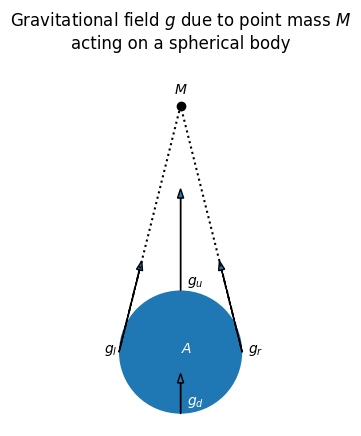

In [1]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.set_axis_off()
ax.add_patch(plt.Circle(
    (0, 0), 1,
))
plt.scatter(0, 4, color='black')
plt.plot([1, 0, -1], [0, 4, 0], linestyle='dotted', color='black')

plt.arrow(-1, 0, 1 / 3, 4 / 3, head_width=0.1)
plt.text(-1.25, 0, '$g_l$')
plt.arrow(1, 0, -1 / 3, 4 / 3, head_width=0.1)
plt.text(1.1, 0, '$g_r$')
plt.arrow(0, 1, 0, 1.5, head_width=0.1)


plt.text(0.1, 1.1, '$g_u$')
plt.arrow(0, -1, 0, 0.5, head_width=0.1)
plt.text(0.1, -0.85, '$g_d$', color='white')
plt.text(0, 0, '$A$', color='white')
plt.text(-0.1, 4.2, '$M$')
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-1.2, 4.8)
plt.title((
    'Gravitational field $g$ due to point mass $M$\n'
    'acting on a spherical body'
))
plt.plot()

Above is an example diagram of planet $A$ in the presence of the gravitational field $\mathbf g$ that is generated by a point mass $M$. (To illustrate the tidal forces, it is not drawn to a realistic scale. In reality, the distances between planets, moons, and stars are much greater than their diameters.)


Field vectors are drawn at four points on the surface of $A$.

$\mathbf g_u$ and $\mathbf g_d$ have the same direction, but they have different magnitudes. The position $\mathbf s_d$ of $\mathbf g_d$ is further away from $M$ than the position $\mathbf s_u$ of $\mathbf g_u$, so $g_d < g_u$. This causes $A$ to stretch out vertically.

$\mathbf g_l$ and $\mathbf g_r$ have the same magnitude, but they have opposing horizontal components pointing inward. These inward force components will cause $A$ to contract horizontally.

And of course there is a third dimension to be aware of. In fact, the effects of $\mathbf g$ on planet $A$ are rotationally symmetric about the axis that connects the centers of $A$ and $M$.

### Comparison of tidal effects

Ok, now I want to ask the question, does the moon or the sun have a stronger effect on Earth's tides? Let's approximate the Earth as a sphere of radius $R$, and assume that its orbits with the moon and the sun are both approximately circular. We'll say that the moon or sun is a point mass $M$ a distance $l$ away from Earth's center.

We need to write down expressions for $\mathbf g_u$, $\mathbf g_d$, $\mathbf g_l$, and $\mathbf g_r$. Let's say that Earth's center is at the origin and the other body is at $l \hat y$. $\mathbf g_u$ and $\mathbf g_d$ are pretty straightforward since they obviously have direction $\hat y$.

$$
\mathbf g_u
= \frac{G M}{(l - R)^2} \hat y
\quad\quad
\mathbf g_d
= \frac{G M}{(l + R)^2} \hat y
$$

$\mathbf g_l$ and $\mathbf g_r$ are slightly more complicated because they are at some angle $\theta$ with respect to $\hat y$.

$$
\mathbf g_l
= \frac{G M}{(\sqrt{l^2 + R^2})^2} \hat s
= \frac{G M}{l^2 + R^2} (\sin\theta \hat x + \cos\theta \hat y)
$$

$$
= \frac{G M}{l^2 + R^2} \Biggl(
    \frac{R}{\sqrt{l^2 + R^2}} \hat x
    + \frac{l}{\sqrt{l^2 + R^2}} \hat y
\Biggr)
$$

$$
\mathbf g_l
= \frac{G M}{(l^2 + R^2)^{3/2}} (R \hat x + l \hat y)
\quad\quad
\mathbf g_r
= \frac{G M}{(l^2 + R^2)^{3/2}} (-R \hat x + l \hat y)
$$

Now that we know the gravitational field at those four points, we should find the differences between them:

$$
\Delta g_{ud}
= |\mathbf g_u - \mathbf g_d|
= GM \Biggl(
   \frac{1}{(l - R)^2}
   - \frac{1}{(l + R)^2}
\Biggr)
$$

$$
= GM \frac{(l + R)^2 - (l - R)^2}{(l - R)^2 (l + R)^2}
= GM \frac{(l^2 + 2 l R + R^2) - (l^2 - 2 l R + R^2)}{(l^2 - R^2)^2}
$$

$$
\Delta g_{ud}
= \frac{4 G M l R}{(l^2 - R^2)^2}
$$

$$
\Delta g_{lr}
= |\mathbf g_l - \mathbf g_r|
= \frac{2 G M R}{(l^2 + R^2)^{3/2}}
$$

One thing to note here is that if we make the approximation that $l \gg R$, then the $R^2$ in the denominators of $\Delta g_{ud}$ and $\Delta g_{lr}$ goes to zero and $\Delta g_{ud} \approx 2 \Delta g_{lr}$. We'll return to that observation in a moment.

Now we can plug in the variables for the Earth-moon and Earth-sun interactions and compare the values of $\Delta g_{ud}$ and $\Delta g_{lr}$ that we get in either case. Whichever one gives larger values will produce a greater tidal effect on Earth.

**Earth-moon**

In [2]:
G = 6.6743e-11  # m^3 kg^-1 s^-2

def calc_dgud(R, M, l):
    return 4 * G * M * l * R / (l**2 - R**2)**2

def calc_dglr(R, M, l):
    return(2 * G * M * R) / (l**2 + R**2)**(3/2)

In [3]:
R = 6_378_000 # m, earth radius
M = 7.347e22  # kg, moon mass
l = 384_400_000 # m, earth-moon distance
dgud = calc_dgud(R, M, l)
dglr = calc_dglr(R, M, l)
print(f'delta g_ud: {dgud / 1e-7:.2f} x 10^-7 m/s^2')
print(f'delta g_lr: {dglr / 1e-7:.2f} x 10^-7 m/s^2')

delta g_ud: 22.04 x 10^-7 m/s^2
delta g_lr: 11.01 x 10^-7 m/s^2


**Earth-sun**

In [4]:
R = 6_378_000 # m, earth radius
M = 1.989e30  # kg, sun mass
l = 150.81e9 # m, earth-sun distance
dgud = calc_dgud(R, M, l)
dglr = calc_dglr(R, M, l)
print(f'delta g_ud: {dgud / 1e-7:.2f} x 10^-7 m/s^2')
print(f'delta g_lr: {dglr / 1e-7:.2f} x 10^-7 m/s^2')

delta g_ud: 9.87 x 10^-7 m/s^2
delta g_lr: 4.94 x 10^-7 m/s^2


We can see that for the Earth-moon interaction, $\Delta g_{ud}$ and $\Delta g_{lr}$ are both a little more than twice those of the Earth-sun interaction. So the moon's tidal effects on Earth are twice as strong as those of the sun.

As mentioned before, it is apparent that:

$$
\Delta g_{ud} \approx 2 \Delta g_{lr}
$$

Remember, there's a third dimension, the forward-back dimension, in which Earth is sqeezed by $\Delta g_{fb} = \Delta g_{lr}$. We could ask the question, which is stronger, the stretching or squeezing forces? The answer would be that neither is stronger, they are balanced because:

$$
\Delta g_{ud} \approx \Delta g_{lr} + \Delta g_{fb}
$$

I'm not exactly sure how to prove it at the moment, but I suspect that the balancing of the stretching and squeezing forces is due to the fact that the gravitational field has zero divergence.

### Surface deformation due to tidal forces

Let's try to identify a method to approximate the shape that a planet takes due to the tidal forces. To do this, we need to first determine the potential energy field due to gravitational and centrifugal forces.

The planet's surface will be a closed equipotential surface in the potential energy field. In order to make that happen, we will assume that the planet reconfigures practically immediately to minimize potential energy. Of course real planets cannot do this because the materials they are composed of interact in very complicated nonlinear ways. But this approximation will gives us a good maximal limit on what kinds of tidal deformations we could expect a planet to have.

We'll find an equation for the potential energy in a reference frame rotating at angular speed $\omega$ so that the two gravitational bodies are stationary.

First, the gravitational potential at position $\mathbf r$ due to a point mass $M$ located at $\mathbf r'$ can be written as:

$$
V_g
= -G M \frac{1}{|\mathbf r - \mathbf r'|} 
= -G M \frac{1}{s}
\quad\quad

\mathbf s = \mathbf r - \mathbf r'
$$

Let's just prove that this potential satisifies the definitive relationship between the potential and the force field. For this, we'll use a coordinate system where $\mathbf s = x \hat x + y \hat y + z \hat z$.

$$
\mathbf g
= -\nabla V_g
= GM \nabla \frac{1}{s}
= GM \Biggl(
    \hat x \frac{\partial}{\partial x} \frac{1}{s}
  + \hat y \frac{\partial}{\partial y} \frac{1}{s}
  + \hat z \frac{\partial}{\partial z} \frac{1}{s}
\Biggr)
$$

We'll focus on the $\hat x$ term first.

$$
\frac{\partial}{\partial x} \frac{1}{s}
= \frac{\partial}{\partial x} \frac{1}{\sqrt{x^2 + y^2 + z^2}}
= \Biggl(
    -\frac{1}{2} \frac{1}{(x^2 + y^2 + z^2)^{3/2}}
\Biggr)
\frac{\partial}{\partial x} (x^2 + y^2 + z^2)
$$

$$
= -\frac{1}{2} \frac{1}{s^3} (2 x)
= - \frac{x}{s^3}
$$

And due to symmetry, we can just replace $x$ for the $\hat y$ and $\hat z$ terms to get:

$$
\mathbf g
= GM \Biggl(
  - \hat x \frac{x}{s^3}
  - \hat y \frac{y}{s^3}
  - \hat z \frac{z}{s^3}
\Biggr)
= - \frac{GM}{s^3} (
  x \hat x
  + y \hat y
  + z \hat z
)
= -\frac{GM}{s^2} \hat s
$$

So $V_g$ is correct. Next, there is the issue of the centrifugal force in the rotating frame. The centrifugal acceleration is:

$$
\mathbf a_c
= \omega^2 \mathbf r_{xy}
= \omega^2 (x \hat x + y \hat y)
$$

As shown in my notes on [Lagrange points](<./Lagrange points.ipynb>), the angular speed of the circular orbit of two masses $m_1$ and $m_2$ a distance $l$ apart from each other is:

$$
\omega^2 = G \frac{m_1 + m_2}{l^3}
$$

We can write the potential of the centrifugal acceleration as:

$$
V_c
= -\frac{\omega^2}{2} {r_{xy}}^2
$$

And we can show that this satisfies the relationship between potential and field:

$$
\mathbf a_c
= -\nabla V_c
= \frac{\omega^2}{2} \Biggl(
    \hat x \frac{\partial}{\partial x}{r_{xy}}^2
  + \hat y \frac{\partial}{\partial y}{r_{xy}}^2
  + \hat z \frac{\partial}{\partial z}{r_{xy}}^2
\Biggr)
$$

We can focus on just the $\hat x$ component for a moment.

$$
\frac{\partial}{\partial x}{r_{xy}}^2
= \frac{\partial}{\partial x} \Bigl(\sqrt{x^2 + y^2}\Bigr)^2
= \Bigl(2 \sqrt{x^2 + y^2}\Bigr) \frac{\partial}{\partial x} \sqrt{x^2 + y^2}
$$

$$
= \Bigl(2 \sqrt{x^2 + y^2}\Bigr)
\Biggl(\frac{1}{2} \frac{1}{\sqrt{x^2 + y^2}}\Biggr)
\frac{\partial}{\partial x} (x^2)
= 2 x
$$

Due to symmetry, we can replace $x$ in the above expression to get the $\hat y$ component. And of course $(\partial/\partial z) {r_{xy}}^2 = 0$, since $r_{xy}$ does not depend on $z$.

$$
\mathbf a_c
= \frac{\omega^2}{2} (
    2 x \hat x
  + 2 y \hat y
)
= \omega^2 \mathbf r_{xy}
$$

Proving that our centrifugal potential $V_c$ is satisfactory.

Ok, so now we have expressions for the potential $V_g$ of the gravitational field of a point particle and the potential $V_c$ of the centrifugal force field.

Since we have two bodies, we'll have two gravitational potentials for masses $m_1$ and $m_2$. The total potential is then:

$$
V
= V_c + V_{g1} + V_{g2}
$$

$$
V
= -\frac{\omega^2}{2}{r_{xy}}^2
- G m_1 \frac{1}{|\mathbf r - \mathbf r_1|} 
- G m_2 \frac{1}{|\mathbf r - \mathbf r_2|} 
$$

Also shown in my notes on Lagrange points, if the center of mass is at the origin and there is a distance $l$ between $m_1$ and $m_2$, then:

$$
r_1 = \frac{m_2}{m_1 + m_2} l
\quad\quad
r_2 = \frac{m_1}{m_1 + m_2} l
$$

Now what if $m_2$ is not actually a point mass but a planet whose surface will get deformed due to tidal forces? Right now, $V_{g2}$ is only an approximation. What we would really like to do is replace the point mass potential with the potential outside of a volume that has mass density distribution $\rho$.

The potential due to a volume mass is:

$$
V_{g2}
= - G \underset{V}{\int} \frac{\rho}{|\mathbf r - \mathbf r'|} d\tau
$$

However, finding the solution for the surface of the planet using this continuous mass potential is complicated. One way to do it involves picking an initial guess for the shape of the surface, encoding it into some kind of data structure, and iteratively relaxing the surface so that it settles on an approximate equipotential of the desired total mass.

So we are going to stick with the point mass approximation after all.

Let's go ahead and plot some of the equipotential surfaces at $z=0$ for given values of $m_1$, $m_2$ and $l$.

$$
V
= -\frac{\omega^2}{2}{r_{xy}}^2
- G m_1 \frac{1}{|\mathbf r - \mathbf r_1|} 
- G m_2 \frac{1}{|\mathbf r - \mathbf r_2|} 
$$

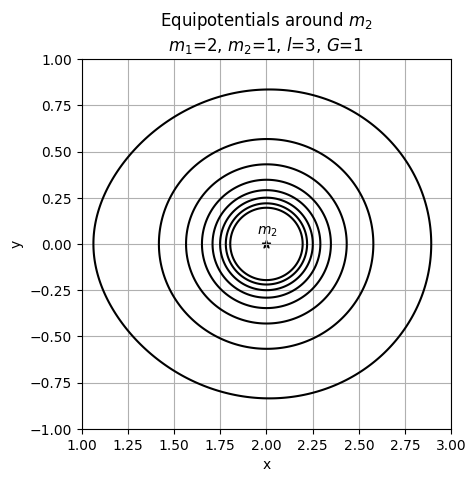

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
G = 1
m1 = 2
m2 = 1
l = 3

# Find positions of bodies and rotational velocity
r1 = l * m2 / (m1 + m2)
r2 = l * m1 / (m1 + m2)

# Calculate V for a range of positions
x_vals = np.linspace(r2-1, r2+1, 500)
y_vals = np.linspace(-1, 1, 500)
x, y = np.meshgrid(x_vals, y_vals)
z = 0
r_xy_sq = x**2 + y**2
denom1 = ((x + r1)**2 + y**2 + z**2)**(1/2)
denom2 = ((x - r2)**2 + y**2 + z**2)**(1/2)
omega2 = G * (m1 + m2) / l**3

V = - omega2 * r_xy_sq / 2 - G * m1 / denom1 - G * m2 / denom2

# Create plot
num_levels = 8
min_V = 2.1
max_V = 6

plt.contour(
    x, y, np.abs(V),
    levels=[min_V + n * (max_V - min_V) / (num_levels - 1)  for n in range(num_levels)],
    colors='black',
    extend='max',
)
plt.scatter([r2], [0], marker='*', color='0.0')
ax = plt.gca()
ax.annotate('$m_2$', (r2-0.05, 0.05))
plt.axis('square')
plt.ylabel('y')
plt.xlabel('x')
plt.title((
    'Equipotentials around $m_2$\n'
    f'$m_1$={m1}, $m_2$={m2}, $l$={3}, $G$={1}'
))
plt.grid()
plt.show()

In the above plot, the contour lines are drawn at several different equipotentials, places where the potential is constant. So essentially it shows us the possible shapes that the surface of the planet could take at different total volumes. Just looking at it, it seems that the smaller the volume of the planet, the closer it will be to a perfect sphere, and the larger it is, the more it gets deformed by the tidal forces. That makes sense, because the greater the diameter of the planet is, the greater the difference between the gravitational forces at two opposing sides of the planet.